In [1]:
import open3d as o3d
import numpy as np
import sys
import os
sys.path.append('..')
import open3d_tutorial as o3dtut
o3dtut.interactive = not 'CI' in os.environ
import matplotlib.pyplot as plt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
color_img_path = './data/color.png'
depth_img_path = './data/depth.png'
# intrensic_path = './data/intrensic.pincam'

In [3]:
color_img = o3d.io.read_image(color_img_path)
depth_img= o3d.io.read_image(depth_img_path)
intrensic = o3d.camera.PinholeCameraIntrinsic(256, 192, 211.949, 211.949, 127.933, 95.9333)

In [4]:
rgbd_img = o3d.geometry.RGBDImage.create_from_color_and_depth(color_img,depth_img)

In [5]:
rgbd_img

RGBDImage of size 
Color image : 256x192, with 1 channels.
Depth image : 256x192, with 1 channels.
Use numpy.asarray to access buffer data.

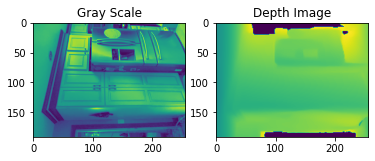

In [6]:
plt.subplot(1,2,1)
plt.title("Gray Scale")
plt.imshow(rgbd_img.color)
plt.subplot(1,2,2)
plt.title("Depth Image")
plt.imshow(rgbd_img.depth)
plt.show()

In [7]:
pc = o3d.io.read_point_cloud('./data/scan1/scan.ply')
o3d.visualization.draw_geometries([pc])

In [8]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_img,
    intrensic
)

In [9]:
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 


In [12]:
trajectory =o3d.io.read_pinhole_camera_trajectory('./data/scan1/frame/lowres_wide_intrinsics/lowres_wide.traj')

[Open3D WARNING] Read camera::PinholeCameraTrajectory failed: unknown file extension.


In [14]:
trajectory.parameters

[]